# EDA of Income Dispersion
The data was taken from the [US Census Bureau](https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-inequality.html) under []Table A-2. Selected Measures of household Income Dispersion](https://www2.census.gov/programs-surveys/demo/tables/p60/263/tableA2.xls). The data covers households in the US from 1967 to 2017.

In order to analyze the data better in Python, I copied the data I needed and pasted it into a new CSV file. This makes it easier to analyze using Python Pandas since I am more familiar with it. I decided to use the first table in the file, Household Income at Selected Percentiles, because it provides a good idea of how much households at each percentile earns.


In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preview the Data

Looking at the head of the file, I can tell that I may need to transpose the data so that each row has data for a given year and each column provides data about that given year.

Also, there appears to be two 2013 columns, so I will have to deal with them by aggregating the data somehow.

In [104]:

df = pd.read_csv('https://raw.githubusercontent.com/jchen2186/mortal-determination/master/raw_data/income_dispersion_us.csv')
df.head()

,Measures of income dispersion,2017,2016,2015,2014,2013,2013.1,2012,2011,2010,...,1976,1975,1974,1973,1972,1971,1970,1969,1968,1967
0,10th percentile limit,14219,13901,13719,12724,12858,13071,13088,13107,13364,...,12782,12712,13069,12981,12396,11626,11446,11713,11418,10489
1,20th percentile limit,24638,24518,23591,22213,22134,22029,22033,22132,22534,...,21232,20771,21849,21744,21282,20567,20835,21192,20576,19305
2,40th percentile limit,47110,46581,45020,42688,43251,42358,42533,42075,42815,...,39557,38983,40528,41812,40987,39207,39913,40664,39010,37644
3,50th (median),61372,60309,58476,55613,56479,54744,54569,54673,55520,...,49833,49020,50338,51984,50955,48862,49342,49728,47946,45965
4,60th percentile limit,77552,76479,74498,70699,70830,69039,69079,68196,69293,...,60258,58907,59886,61865,60577,57695,58054,58809,55915,53429


In [105]:
df.describe()

,2017,2016,2015,2014,2013,2013.1,2012,2011,2010,2009,...,1976,1975,1974,1973,1972,1971,1970,1969,1968,1967
count,8.00000,8.000000,8.000000,8.000000,8.00000,8.00000,8.00000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,95982.12500,93713.375000,90758.500000,87201.625000,87720.87500,84695.12500,84159.75000,83896.000000,84493.375000,85945.625000,...,64876.375000,63358.500000,65277.875000,67199.87500,65479.875000,62050.750000,62355.875000,62284.375000,59427.125000,57758.375000
std,78789.71266,76312.651312,73579.320328,71468.415505,71967.69918,68622.58546,67764.54173,67566.909665,67395.391385,67952.251505,...,43750.074661,42418.494063,43687.513644,45421.81811,44158.956304,41374.734754,41386.743624,40628.925983,38440.836777,38357.224769
min,14219.00000,13901.000000,13719.000000,12724.000000,12858.00000,13071.00000,13088.00000,13107.000000,13364.000000,13881.000000,...,12782.000000,12712.000000,13069.000000,12981.00000,12396.000000,11626.000000,11446.000000,11713.000000,11418.000000,10489.000000
25%,41492.00000,41065.250000,39662.750000,37569.250000,37971.75000,37275.75000,37408.00000,37089.250000,37744.750000,38969.500000,...,34975.750000,34430.000000,35858.250000,36795.00000,36060.750000,34547.000000,35143.500000,35796.000000,34401.500000,33059.250000
50%,69462.00000,68394.000000,66487.000000,63156.000000,63654.50000,61891.50000,61824.00000,61434.500000,62406.500000,63895.500000,...,55045.500000,53963.500000,55112.000000,56924.50000,55766.000000,53278.500000,53698.000000,54268.500000,51930.500000,49697.000000
75%,139910.50000,136266.500000,132746.000000,128071.500000,128094.75000,123248.75000,122549.50000,122433.000000,123618.500000,125305.250000,...,92813.250000,90541.250000,93203.500000,95548.75000,92877.250000,88085.250000,88496.250000,87934.000000,83692.250000,81337.750000
max,237034.00000,230095.000000,221900.000000,214100.000000,216208.00000,206587.00000,204466.00000,203165.000000,203355.000000,206156.000000,...,137486.000000,133470.000000,137567.000000,143164.00000,139539.000000,130642.000000,130926.000000,129225.000000,122913.000000,122264.000000


## Cleaning Data


In [106]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7
Measures of income dispersion,10th percentile limit,20th percentile limit,40th percentile limit,50th (median),60th percentile limit,80th percentile limit,90th percentile limit,95th percentile limit
2017,14219,24638,47110,61372,77552,126855,179077,237034
2016,13901,24518,46581,60309,76479,123621,174203,230095
2015,13719,23591,45020,58476,74498,121060,167804,221900
2014,12724,22213,42688,55613,70699,116355,163221,214100


In [107]:
column_names = [df[i][0] for i in range(8)]
column_names

['10th percentile limit',
 '20th percentile limit',
 '40th percentile limit',
 '50th (median)',
 '60th percentile limit',
 '80th percentile limit',
 '90th percentile limit',
 '95th percentile limit']

In [0]:
# rename the index and columns
df.index.name = 'Year'
df.columns = column_names

# remove the first row which originally had the index and column names
df = df.drop(df.index[0])

In [118]:
df['Year'] = df.index
df = df.reset_index(drop=True)
df.head()

,10th percentile limit,20th percentile limit,40th percentile limit,50th (median),60th percentile limit,80th percentile limit,90th percentile limit,95th percentile limit,Year
0,14219,24638,47110,61372,77552,126855,179077,237034,2017
1,13901,24518,46581,60309,76479,123621,174203,230095,2016
2,13719,23591,45020,58476,74498,121060,167804,221900,2015
3,12724,22213,42688,55613,70699,116355,163221,214100,2014
4,12858,22134,43251,56479,70830,116186,163821,216208,2013


In [122]:
# drop row with year = 2013.1
df = df.drop(df[(df['Year'] == '2013.1')].index)
df.head()

,10th percentile limit,20th percentile limit,40th percentile limit,50th (median),60th percentile limit,80th percentile limit,90th percentile limit,95th percentile limit,Year
0,14219,24638,47110,61372,77552,126855,179077,237034,2017
1,13901,24518,46581,60309,76479,123621,174203,230095,2016
2,13719,23591,45020,58476,74498,121060,167804,221900,2015
3,12724,22213,42688,55613,70699,116355,163221,214100,2014
4,12858,22134,43251,56479,70830,116186,163821,216208,2013


In [128]:
for col in list(df.columns):
  df[col] = pd.to_numeric(df[col])
  
df.head()

,10th percentile limit,20th percentile limit,40th percentile limit,50th (median),60th percentile limit,80th percentile limit,90th percentile limit,95th percentile limit,Year
0,14219,24638,47110,61372,77552,126855,179077,237034,2017
1,13901,24518,46581,60309,76479,123621,174203,230095,2016
2,13719,23591,45020,58476,74498,121060,167804,221900,2015
3,12724,22213,42688,55613,70699,116355,163221,214100,2014
4,12858,22134,43251,56479,70830,116186,163821,216208,2013


In [130]:
df.dtypes

10th percentile limit    int64
20th percentile limit    int64
40th percentile limit    int64
50th (median)            int64
60th percentile limit    int64
80th percentile limit    int64
90th percentile limit    int64
95th percentile limit    int64
Year                     int64
dtype: object

## Visualize Data

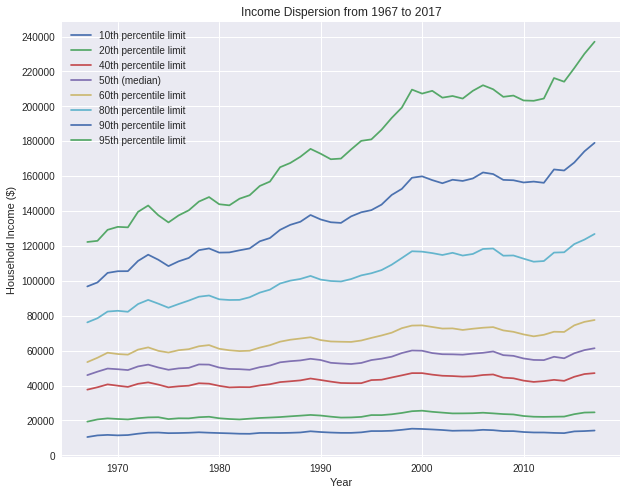

In [146]:
for col in list(df.columns):
  if col != 'Year':
    plt.plot(df['Year'], df[col])

plt.title('Income Dispersion from 1967 to 2017')
plt.xlabel('Year')
plt.ylabel('Household Income ($)')
plt.yticks([i * 20000 for i in range(13)])
plt.legend()
# plt.figure(figsize=(30,20))

fig = plt.gcf()
fig.set_size_inches(10, 8)


plt.show()

## Export Cleaned Data

In [0]:
df.to_csv('cleaned_income_dispersion.csv')